# Analysis of Ozone at night at 1x1 degree

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.options.mode.use_inf_as_na = True
import numpy as np
import os
import math
from scipy.stats import pearsonr as corr
from matplotlib import pyplot as plt
import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
AIRS_PATH="airs/data/" #path where the data made is stored
COVID_PATH="covidoxford/data/"#path for data regarding covid
CITIES_PATH="cities/data/"#city information path

In [ ]:
cities_df=pd.read_csv(CITIES_PATH+"cities_1degx1deg.csv",delimiter="~")

In [ ]:
airs_df=pd.read_csv(AIRS_PATH+"indian_cities_1degx1deg_airs.csv")

In [ ]:
airs_df["metric"].unique()

array(['SurfPres_Forecast_TqJ_A', 'SurfSkinTemp_TqJ_A', 'EmisIR_TqJ_A#1',
       'EmisIR_TqJ_A#2', 'EmisIR_TqJ_A#3', 'EmisIR_TqJ_A#4',
       'Temperature_TqJ_A#1', 'Temperature_TqJ_A#2',
       'Temperature_TqJ_A#3', 'Temperature_TqJ_A#4',
       'Temperature_TqJ_A#5', 'Temperature_TqJ_A#6',
       'Temperature_TqJ_A#7', 'Temperature_TqJ_A#8',
       'Temperature_TqJ_A#9', 'Temperature_TqJ_A#10',
       'Temperature_TqJ_A#11', 'Temperature_TqJ_A#12',
       'Temperature_TqJ_A#13', 'Temperature_TqJ_A#14',
       'Temperature_TqJ_A#15', 'Temperature_TqJ_A#16',
       'Temperature_TqJ_A#17', 'Temperature_TqJ_A#18',
       'Temperature_TqJ_A#19', 'Temperature_TqJ_A#20',
       'Temperature_TqJ_A#21', 'Temperature_TqJ_A#22',
       'Temperature_TqJ_A#23', 'Temperature_TqJ_A#24',
       'SurfAirTemp_TqJ_A', 'TropPres_TqJ_A', 'TropTemp_TqJ_A',
       'TotH2OVap_TqJ_A', 'H2O_MMR_Lyr_TqJ_A#1', 'H2O_MMR_Lyr_TqJ_A#2',
       'H2O_MMR_Lyr_TqJ_A#3', 'H2O_MMR_Lyr_TqJ_A#4',
       'H2O_MMR_Lyr_TqJ_A

In [ ]:
metric="TotO3_TqJ_D"

In [ ]:
metric_df=airs_df[(airs_df["metric"]==metric)&(airs_df["mean"]>-9999)&(~airs_df["mean"].isna())]

# Weekwise O3 average of all cities of 2019 and 2020

In [ ]:
x=[]
values1=[]
values2=[]
for month in range(1,13):
    for week in range(1,5):
        week1=str(month)+".2019.week"+str(week)
        week2=str(month)+".2020.week"+str(week)
        week1_data=metric_df[metric_df["week"]==week1].set_index("location")["mean"].to_dict()
        week2_data=metric_df[metric_df["week"]==week2].set_index("location")["mean"].to_dict()
        temp1=[]
        temp2=[]
        for location in week1_data:
            if location in week2_data:
                temp1.append(week1_data[location])
                temp2.append(week2_data[location])
        if len(temp1)>=100:
            x.append((month-1)*4+week)
            values1.append(np.mean(temp1))
            values2.append(np.mean(temp2))
            print(" month =",month," week =",week,"2019 =",temp1[-1],"2020 =",temp2[-1])

 month = 1  week = 1 2019 = 256.375 2020 = 225.03125
 month = 1  week = 2 2019 = 247.35938 2020 = 242.20312
 month = 1  week = 3 2019 = 251.9375 2020 = 236.8125
 month = 1  week = 4 2019 = 258.40625 2020 = 241.82812
 month = 2  week = 1 2019 = 242.35938 2020 = 239.79688
 month = 2  week = 2 2019 = 254.5 2020 = 239.40625
 month = 2  week = 3 2019 = 259.3125 2020 = 260.1875
 month = 3  week = 1 2019 = 251.51562 2020 = 250.79688
 month = 3  week = 2 2019 = 248.46875 2020 = 248.32812
 month = 3  week = 3 2019 = 266.21875 2020 = 261.34375
 month = 3  week = 4 2019 = 275.09375 2020 = 259.21875
 month = 4  week = 1 2019 = 270.5625 2020 = 243.70312
 month = 4  week = 2 2019 = 272.09375 2020 = 266.9375
 month = 4  week = 3 2019 = 229.59375 2020 = 261.28125
 month = 4  week = 4 2019 = 242.51562 2020 = 269.9375
 month = 5  week = 1 2019 = 268.53125 2020 = 214.35938
 month = 5  week = 2 2019 = 286.34375 2020 = 235.67188
 month = 5  week = 3 2019 = 276.6875 2020 = 254.17188
 month = 6  week = 1 201

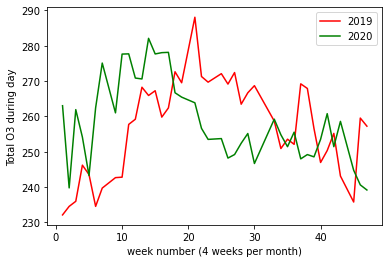

In [ ]:
plt.plot(x,values1,label="2019",color="red")
plt.plot(x,values2,label="2020",color="green")
plt.legend()
plt.xlabel("week number (4 weeks per month)")
plt.ylabel("Total O3 during night")
plt.show()

Takeaway: In 2020, O3 was increasing from beginning of the year. It stayed high during lockdown in April. It started decreasing in May, when lockdown started to ease. During the months of post lockdown phase (May-June-July), O3 was lower and followed different pattern than 2019.

# Difference in O3 values between the same week of 2020 and 2019

In [ ]:
week1="4.2019.week4"
week2="4.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df["diff"]=(week_df["mean_2020"]-week_df["mean_2019"])*100/week_df["mean_2019"]
week_df["diff"].describe()

count    311.000000
mean       7.089875
std        4.800990
min       -5.585682
25%        3.984846
50%        5.687878
75%        9.307563
max       23.972421
Name: diff, dtype: float64

In [ ]:
print("cities with high increase")
temp=week_df[week_df["diff"]>=12]["city"].tolist()
print(temp)

cities with high increase
['Padam', 'Joshimath', 'Pithoragarh', 'Along', 'Pasighat', 'Hayuliang', 'Sitapur', 'Bagaha', 'Darjiling', 'Tawang', 'Bomdila', 'Itanagar', 'Dibrugarh', 'Tinsukia', 'Tezu', 'Kanpur', 'Madhubani', 'Kishanganj', 'Siliguri', 'Jaigaon', 'Bongaigaon', 'Guwahati', 'Tezpur', 'Golaghat', 'Jorhat', 'Mon', 'Sarupathar', 'Bhagalpur', 'Raiganj', 'Mankachar', 'Tura', 'Shillong', 'Khliehriat', 'Dimapur', 'Kohima', 'Imphal']


In [ ]:
print("cities with low increase")
temp=week_df[week_df["diff"]<=3]["city"].tolist()
print(temp)

cities with low increase
['Ludhiana', 'Jaisalmer', 'Pali', 'Bhilwara', 'Kota', 'Dayapar', 'Gandhidham', 'Mandvi', 'Rajkot', 'Junagadh', 'Jalgaon', 'Nagpur', 'Contai', 'Kakdwip', 'Chalisgaon', 'Paradip Garh', 'Brahmapur', 'Konarka', 'Samalkot', 'Visakhapatnam', 'Vijayawada', 'Kakinada', 'Davangere', 'Udupi', 'Shimoga', 'Hassan', 'Mangalore', 'Payyannur', 'Mysore', 'Kozhikode', 'Port Blair', 'Kavaratti', 'Ponnani']


In [ ]:
week_df[week_df["diff"]>=7]["elevation"].describe()

count     126.000000
mean      480.579365
std       651.863057
min         7.000000
25%       100.750000
50%       227.000000
75%       536.500000
max      3560.000000
Name: elevation, dtype: float64

In [ ]:
week_df[week_df["population"]>=5000000]["diff"].describe()

count    11.000000
mean      5.850605
std       2.784462
min       3.250094
25%       3.899856
50%       5.098533
75%       6.277885
max      12.053410
Name: diff, dtype: float64

In [ ]:
week1="6.2019.week1"
week2="6.2020.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df["diff"]=(week_df["mean_2020"]-week_df["mean_2019"])*100/week_df["mean_2019"]
week_df["diff"].describe()

count    311.000000
mean      -8.344616
std        4.577990
min      -20.123794
25%      -11.550175
50%       -8.100529
75%       -4.776653
max        2.130020
Name: diff, dtype: float64

Takeaway: On an average there was 4.5% increase in O3 in first week of lockdown (4th week of March) in 2020 compared to 2019. In 4th week of April, this increase became 7%. Cities with high increase appear to be more towards north and noth-east. Cities with low increase seem to be towards south and west. Also the cities with high increase have higher elevation compared to the cities with low increase. Another interesting point is that the cities with very high populations are not particularly the ones which have higher increase in O3.

Post lockdown, 7-8% decrease is also seen in O3 values in 2020 compared to the values in 2019

# Pre and Post lockdown in 2020

In [ ]:
week1="3.2020.week1"
week2="4.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df["diff"]=(week_df["mean_post"]-week_df["mean_pre"])*100/week_df["mean_pre"]
week_df["diff"].describe()

count    311.000000
mean       6.701331
std        4.836987
min      -17.306914
25%        4.914168
50%        7.239981
75%        9.855121
max       16.076861
Name: diff, dtype: float64

In [ ]:
print("cities with high increase")
temp=week_df[week_df["diff"]>=12]["city"].tolist()
print(temp)

cities with high increase
['Nanded', 'Adilabad', 'Uran', 'Baramati', 'Latur', 'Udgir', 'Nizamabad', 'Ramgundam', 'Vizianagaram', 'Palasa', 'Karad', 'Solapur', 'Gulbarga', 'Bidar', 'Hyderabad', 'Warangal', 'Visakhapatnam', 'Bijapur', 'Shorapur', 'Raichur', 'Wanparti', 'Mirialguda', 'Machilipatnam', 'Adoni', 'Ongole']


In [ ]:
week_df[week_df["population"]>=4000000]

,location,week_pre,mean_pre,sdev_pre,week_post,mean_post,sdev_post,city,population,elevation,diff
33,28.5#77.5,3.2020.week1,274.12500,6.218750,4.2020.week4,287.03125,10.00000,Delhi,19975171,216,4.708162
70,26.5#80.5,3.2020.week1,267.46875,6.656250,4.2020.week4,291.09375,9.12500,Kanpur,5804013,130,8.832808
137,23.5#72.5,3.2020.week1,263.46875,16.625000,4.2020.week4,280.78125,6.43750,Ahmedabad,7164583,101,6.570988
177,22.5#88.5,3.2020.week1,259.96875,8.562500,4.2020.week4,286.65625,11.31250,Kolkata,13043739,10,10.265657
182,21.5#72.5,3.2020.week1,255.35938,10.687500,4.2020.week4,277.50000,5.15625,Surat,5615467,19,8.670377
216,19.5#72.5,3.2020.week1,250.89062,6.718750,4.2020.week4,278.15625,4.90625,Mumbai,15527315,15,10.867537
217,19.5#73.5,3.2020.week1,246.28125,5.750000,4.2020.week4,275.46875,5.31250,Navi Mumbai,8209055,286,11.851288
232,18.5#73.5,3.2020.week1,245.57812,3.546875,4.2020.week4,274.40625,5.18750,Pune,6020226,369,11.738884
248,17.5#78.5,3.2020.week1,240.73438,9.375000,4.2020.week4,277.84375,5.53125,Hyderabad,5412838,532,15.415069
284,13.5#80.5,3.2020.week1,249.06250,4.968750,4.2020.week4,266.56250,19.25000,Chennai,5720838,15,7.026349


In [ ]:
week1="3.2020.week1"
week2="6.2020.week3"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df["diff"]=(week_df["mean_post"]-week_df["mean_pre"])*100/week_df["mean_pre"]
week_df["diff"].describe()

count    311.000000
mean      -2.759323
std        5.968746
min      -23.226233
25%       -6.385291
50%       -2.991213
75%        1.397070
max       15.087087
Name: diff, dtype: float64

Takeaway: There is around 7% increase in O3 in 2020 during lockdown in compared to before lockdown. Post lockdown, O3 decreases and no difference is observed. Infact a decrease of -2 to -3% is observed. So clearly, Ozone went up during lockdown and came down to pre-lockdown levels post lockdown.

# Comparison of percentage change between pre and post lockdown dates of 2019 and 2020

        diff_2019   diff_2020    population    elevation
count  311.000000  311.000000  3.110000e+02   311.000000
mean     7.252204    3.885680  9.414453e+05   370.488746
std      6.367362    3.625066  1.886862e+06   485.665396
min    -21.448453   -8.633455  0.000000e+00 -1226.000000
25%      5.957365    1.850000  2.002160e+05    93.000000
50%      8.053074    4.733427  4.497920e+05   249.000000
75%     10.767017    6.395594  9.992885e+05   459.500000
max     18.029953   11.193398  1.997517e+07  3560.000000


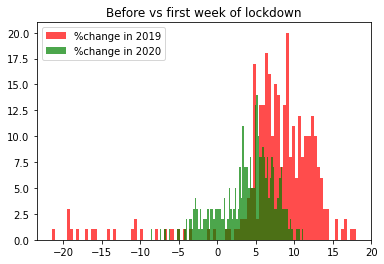

In [ ]:
week1="3.2019.week1"
week2="3.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["diff"]=(week_df_2019["mean_post"]-week_df_2019["mean_pre"])*100/week_df_2019["mean_pre"]
week_df_2019=week_df_2019[["location","diff"]]
week1="3.2020.week1"
week2="3.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["diff"]=(week_df_2020["mean_post"]-week_df_2020["mean_pre"])*100/week_df_2020["mean_pre"]
week_df_2020=week_df_2020[["location","diff"]]

week_df=week_df_2019.merge(week_df_2020,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")

print(week_df.describe())

plt.hist(week_df["diff_2019"].tolist(),bins=100,label="%change in 2019",color="red",alpha=0.7)
plt.hist(week_df["diff_2020"].tolist(),bins=100,label="%change in 2020",color="green",alpha=0.7)
plt.legend()
plt.title("Before vs first week of lockdown")
plt.show()

        diff_2019   diff_2020    population    elevation
count  311.000000  311.000000  3.110000e+02   311.000000
mean     7.624627    6.701331  9.414453e+05   370.488746
std      8.114638    4.836987  1.886862e+06   485.665396
min    -26.963711  -17.306914  0.000000e+00 -1226.000000
25%      4.946230    4.914168  2.002160e+05    93.000000
50%     10.398432    7.239981  4.497920e+05   249.000000
75%     12.393317    9.855121  9.992885e+05   459.500000
max     19.983499   16.076861  1.997517e+07  3560.000000


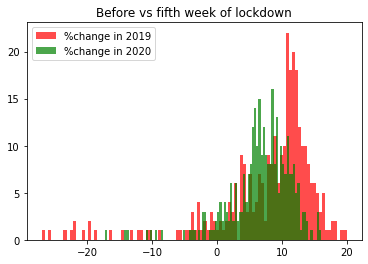

In [ ]:
week1="3.2019.week1"
week2="4.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["diff"]=(week_df_2019["mean_post"]-week_df_2019["mean_pre"])*100/week_df_2019["mean_pre"]
week_df_2019=week_df_2019[["location","diff"]]
week1="3.2020.week1"
week2="4.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["diff"]=(week_df_2020["mean_post"]-week_df_2020["mean_pre"])*100/week_df_2020["mean_pre"]
week_df_2020=week_df_2020[["location","diff"]]

week_df=week_df_2019.merge(week_df_2020,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")

print(week_df.describe())

plt.hist(week_df["diff_2019"].tolist(),bins=100,label="%change in 2019",color="red",alpha=0.7)
plt.hist(week_df["diff_2020"].tolist(),bins=100,label="%change in 2020",color="green",alpha=0.7)
plt.legend()
plt.title("Before vs fifth week of lockdown")
plt.show()

        diff_2019   diff_2020    population    elevation
count  311.000000  311.000000  3.110000e+02   311.000000
mean    11.561233   -2.759323  9.414453e+05   370.488746
std      6.591734    5.968746  1.886862e+06   485.665396
min    -17.930157  -23.226233  0.000000e+00 -1226.000000
25%      9.611796   -6.385291  2.002160e+05    93.000000
50%     12.656394   -2.991213  4.497920e+05   249.000000
75%     15.425826    1.397070  9.992885e+05   459.500000
max     23.638796   15.087087  1.997517e+07  3560.000000


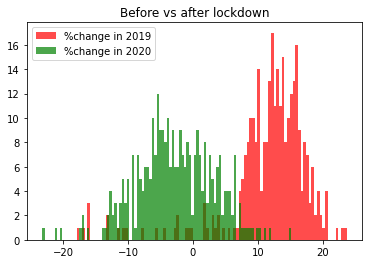

In [ ]:
week1="3.2019.week1"
week2="6.2019.week3"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["diff"]=(week_df_2019["mean_post"]-week_df_2019["mean_pre"])*100/week_df_2019["mean_pre"]
week_df_2019=week_df_2019[["location","diff"]]
week1="3.2020.week1"
week2="6.2020.week3"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["diff"]=(week_df_2020["mean_post"]-week_df_2020["mean_pre"])*100/week_df_2020["mean_pre"]
week_df_2020=week_df_2020[["location","diff"]]

week_df=week_df_2019.merge(week_df_2020,on="location",how="inner",suffixes=["_2019","_2020"])
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")

print(week_df.describe())

plt.hist(week_df["diff_2019"].tolist(),bins=100,label="%change in 2019",color="red",alpha=0.7)
plt.hist(week_df["diff_2020"].tolist(),bins=100,label="%change in 2020",color="green",alpha=0.7)
plt.legend()
plt.title("Before vs after lockdown")
plt.show()

Takeaway: In 2019, the percentage changes are higher than the percentage changes in 2020. But the gap between them reduces when we are deep in lockdown. During 5th week of lockdown, the gap between them is much lower, with both being positive. Post lockdown, the difference in the percentage changes is much higher with 2020 being negative. This gives a good evidence of increase in O3 during lockdown and significant decrease in O3 post lockdown.

# Impact of covid-19 on O3 compared to pre-lockdown dates' values 

In [ ]:
week1="3.2019.week1"
week2="4.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019=week_df_2019[["mean_pre","mean_post"]]
week_df_2019["covid"]=0
week1="3.2020.week1"
week2="4.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020=week_df_2020[["mean_pre","mean_post"]]
week_df_2020["covid"]=1

week_df=week_df_2019.append(week_df_2020)

result = sm.ols(formula="mean_post ~ mean_pre + covid", data=week_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              mean_post   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     306.3
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           3.39e-93
Time:                        17:58:06   Log-Likelihood:                -2265.6
No. Observations:                 622   AIC:                             4537.
Df Residuals:                     619   BIC:                             4550.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    241.8761      5.487     44.081      0.0

Takeaway: If controlled for pre-lockdown (march first-week) values, covid leads to increase in O3 values

In [ ]:
week1="3.2019.week1"
week2="7.2019.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019=week_df_2019[["mean_pre","mean_post"]]
week_df_2019["covid"]=0
week1="3.2020.week1"
week2="7.2020.week1"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020=week_df_2020[["mean_pre","mean_post"]]
week_df_2020["covid"]=1

week_df=week_df_2019.append(week_df_2020)

result = sm.ols(formula="mean_post ~ mean_pre + covid", data=week_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              mean_post   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     260.7
Date:                Sun, 31 Oct 2021   Prob (F-statistic):           7.78e-83
Time:                        17:58:10   Log-Likelihood:                -2401.9
No. Observations:                 621   AIC:                             4810.
Df Residuals:                     618   BIC:                             4823.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    192.9055      6.876     28.055      0.0

Takeaway: Covid leads to decrease in O3 after lockdown compared to pre-lockdown values

# Impact of elevation on O3

In [ ]:
week1="3.2019.week1"
week2="4.2019.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean"]]
week_df_2019=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2019["covid"]=0
week1="3.2020.week1"
week2="4.2020.week4"
week1_df=metric_df[metric_df["week"]==week1][["location","week","mean","sdev"]]
week2_df=metric_df[metric_df["week"]==week2][["location","week","mean","sdev"]]
week_df_2020=week1_df.merge(week2_df,on="location",how="inner",suffixes=["_pre","_post"])
week_df_2020["covid"]=1
week_df=week_df_2019.append(week_df_2020)
week_df=week_df.merge(cities_df[["location","city","population","elevation"]],on="location",how="inner")
week_df['elevated'] = np.where(week_df['elevation']>=249,1,0)
week_df['dense'] = np.where(week_df['population']>=500000,1,0)

result = sm.ols(formula="mean_post ~ mean_pre + covid + elevation", data=week_df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              mean_post   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     260.5
Date:                Sun, 31 Oct 2021   Prob (F-statistic):          3.02e-109
Time:                        18:03:13   Log-Likelihood:                -2225.3
No. Observations:                 622   AIC:                             4459.
Df Residuals:                     618   BIC:                             4476.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    222.5846      5.555     40.072      0.0

In [ ]:
week_df["predicted"]=result.params["Intercept"]+result.params["mean_pre"]*week_df["mean_pre"]+result.params["covid"]*week_df["covid"]+result.params["elevation"]*week_df["elevation"]

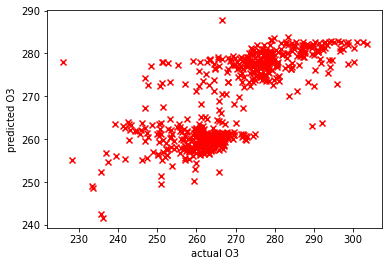

In [ ]:
plt.scatter(x=week_df[week_df["covid"]==1]["mean_post"],y=week_df[week_df["covid"]==1]["predicted"],color="red", marker="x",label="2020")
plt.scatter(x=week_df[week_df["covid"]==0]["mean_post"],y=week_df[week_df["covid"]==0]["predicted"],color="green", marker="x",label="2019")
plt.legend()
plt.xlabel("actual O3")
plt.ylabel("predicted O3")
plt.show()